Задача: Сформировать ежемесячную таблицу и график Retention

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('orders.csv') 

data['shipped_at'] = pd.to_datetime(data['shipped_at'], format = '%Y-%m-%d %H:%M:%S') 
data['ret_month'] = data['shipped_at'].apply(lambda x: x.strftime('%Y-%m')) 

first_orders = data.groupby('user_id')['shipped_at'].min().apply(lambda x: x.strftime('%Y-%m')) 

joined = data.merge(first_orders, on='user_id', how = 'left') 
joined.rename(columns={'shipped_at_y': 'first_order'}, inplace = True) 

joined = joined.groupby(['first_order','ret_month'])['user_id'].unique() 

joined = pd.DataFrame(joined.apply(len).reset_index()) 
joined['max_user'] = joined.groupby('first_order')['user_id'].transform('max') 
joined['month'] = joined.sort_values(['first_order','ret_month']).groupby('first_order').cumcount() 
joined['ret'] = round((joined['user_id'] / joined['max_user'])*100,2)

In [214]:
retention = joined.pivot_table(index='first_order',columns='ret_month',values='ret') 
retention.head(30)

#retention = joined.pivot_table(index='first_order',columns='month',values='ret') 
#retention.head(30)

ret_month,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
first_order,,,,,,,,,,,,,,,,,
2018-08,100.0,41.38,38.33,33.74,27.34,25.86,21.43,22.51,22.51,21.77,23.74,23.30,22.32,22.76,22.27,16.80,14.98
2018-09,NaN,100.00,31.03,25.04,18.93,17.36,15.06,14.96,15.27,15.52,16.65,16.65,16.72,17.36,17.21,13.52,12.12
2018-10,NaN,NaN,100.00,19.62,13.91,12.37,10.79,10.40,10.38,10.86,11.49,11.48,11.41,12.02,12.73,9.87,9.50
2018-11,NaN,NaN,NaN,100.00,15.53,13.01,10.77,10.12,10.98,10.74,11.17,11.21,10.51,11.63,11.81,9.75,8.80
2018-12,NaN,NaN,NaN,NaN,100.00,15.40,12.13,10.94,11.12,10.84,10.80,10.46,10.28,10.15,10.97,9.58,9.28
2019-01,NaN,NaN,NaN,NaN,NaN,100.00,15.79,13.73,12.69,12.22,12.13,12.59,11.16,11.69,11.69,10.05,9.71
2019-02,NaN,NaN,NaN,NaN,NaN,NaN,100.00,18.01,16.04,14.18,14.38,14.29,12.83,13.03,13.34,11.73,10.86
2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,22.54,18.52,17.30,17.47,14.91,15.75,15.93,14.18,12.54
2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,23.50,19.78,18.37,15.92,16.49,16.58,13.85,11.89


Text(0.5, 1.0, 'User Retention month to month')

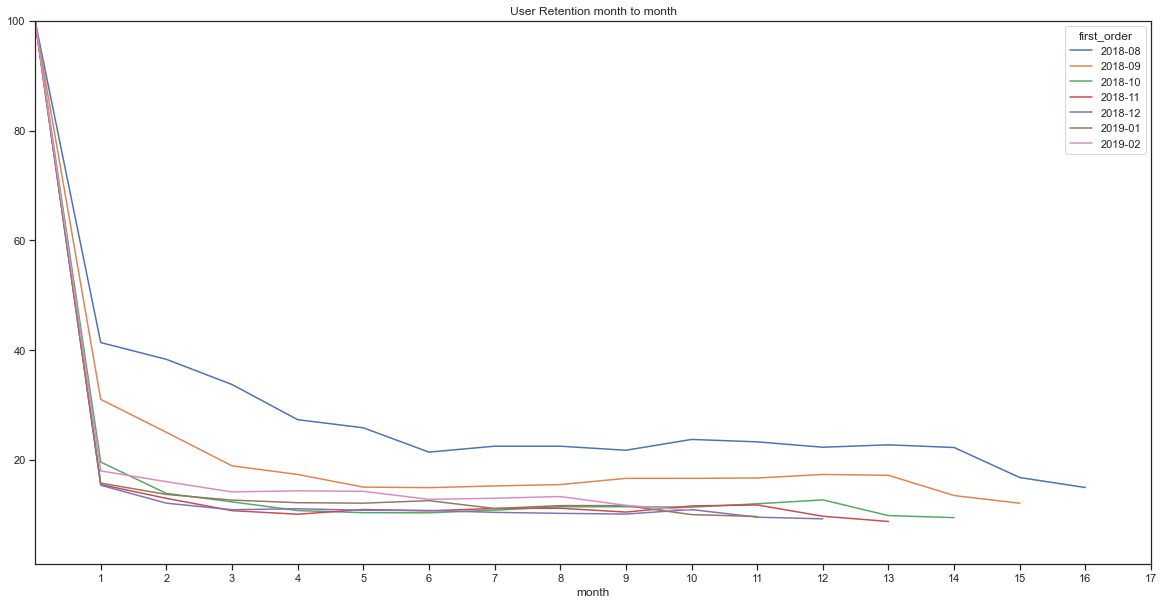

In [215]:
retention = joined.pivot_table(index='month',columns='first_order',values='ret') 
retention[['2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02']].plot(figsize=(20,10))
plt.xticks(np.arange(1, 18, 1)) 
plt.xlim(0, 17)
plt.ylim(1, 100)
plt.title('User Retention month to month')